# Practical 9
## Creating the tipping controller using the skfuzzy control API

/home/cskushal18/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


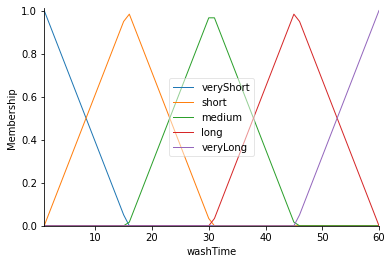

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Antecedent(input variables)/Consequent(output variables)
dirtnessOfClothes = ctrl.Antecedent(np.arange(1, 101), 'dirtnessOfClothes')
typeOfDirt = ctrl.Antecedent(np.arange(1, 101), 'typeOfDirt')
washTime = ctrl.Consequent(np.arange(1, 61), 'washTime') # since 1 to 60 mins

# Auto-membership function population for "Antecedent"
dirtnessOfClothes.automf(3, names=['large', 'medium', 'small'])
typeOfDirt.automf(3, names=['greasy', 'medium', 'notgreasy'])

washTime.automf(5, names=['veryShort', 'short', 'medium', 'long', 'veryLong'])

'''
# Custom membership functions for "Consequent"
washTime['veryShort'] = fuzz.trimf(washTime.universe, [0, 0, 12])
washTime['short'] = fuzz.trimf(washTime.universe, [12, (12+24)//2, 24])
washTime['medium'] = fuzz.trimf(washTime.universe, [24, (24+36)//2, 36])
washTime['long'] = fuzz.trimf(washTime.universe, [36, (36+48)//2, 48])
washTime['veryLong'] = fuzz.trimf(washTime.universe, [48, (48+60)//2, 60])
'''

washTime.view()

## Rules

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

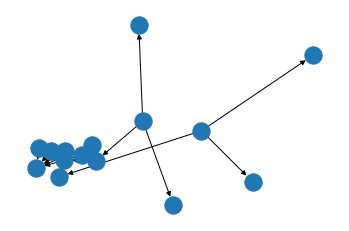

In [5]:
rule1 = ctrl.Rule(dirtnessOfClothes['large'] & typeOfDirt['greasy'], washTime['veryLong'])
rule2 = ctrl.Rule(dirtnessOfClothes['medium'] & typeOfDirt['greasy'], washTime['long'])
rule3 = ctrl.Rule(dirtnessOfClothes['small'] & typeOfDirt['greasy'], washTime['long'])

rule4 = ctrl.Rule(dirtnessOfClothes['large'] & typeOfDirt['medium'], washTime['long'])
rule5 = ctrl.Rule(dirtnessOfClothes['medium'] & typeOfDirt['medium'], washTime['medium'])
rule6 = ctrl.Rule(dirtnessOfClothes['small'] & typeOfDirt['medium'], washTime['medium'])

rule7 = ctrl.Rule(dirtnessOfClothes['large'] & typeOfDirt['notgreasy'], washTime['medium'])
rule8 = ctrl.Rule(dirtnessOfClothes['medium'] & typeOfDirt['notgreasy'], washTime['short'])
rule9 = ctrl.Rule(dirtnessOfClothes['small'] & typeOfDirt['notgreasy'], washTime['veryShort'])

rule9.view()

## Control system creation and simulation

In [6]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [7]:
import random

22.46128684141371


/home/cskushal18/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


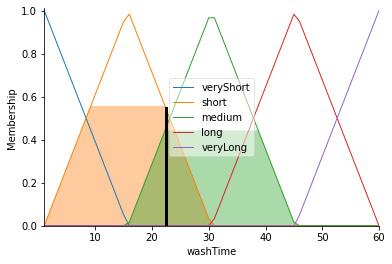

In [11]:
tipping.input['dirtnessOfClothes'] = random.random() + random.randint(1, 100)
tipping.input['typeOfDirt'] = random.random() + random.randint(1, 100)

tipping.compute()

print(tipping.output['washTime'])
washTime.view(sim=tipping)